In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [3]:
import pandas as pd

clothes_data = pd.read_json("/kaggle/input/prj-data/preprocess_data.json")

In [4]:
clothes_data

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,295,5,0,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,295,0,2,45.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,295,0,3,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,295,1,1,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,198,0,4,16.99,2,0,35,4.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,Women's Full Slips Adjustable Spaghetti Strap ...,B0D1TH4KMX,158,10,3,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19764,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SXP3WB,158,7,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19765,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SYVMC4,158,1,1,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19766,Women's Full Slips Adjustable Spaghetti Strap ...,B0CTYL3FB9,158,5,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0


In [5]:
clothes_data.columns

Index(['name', 'asin', 'brand', 'color', 'size', 'price', 'department',
       'origin', 'rating', 'star', 'url', 'Polyester', 'Spandex', 'Nylon',
       'Cotton', 'Rayon', 'Acrylic', 'Modal', 'Wool', 'Lyocell', 'Leather',
       'Linen', 'Silk', 'Machine Wash', 'Hand Wash', 'Not Bleach',
       'Tumble Dry', 'Pull on', 'Tie', 'Zipper', 'Button', 'No closure',
       'Elastic', 'Lace Up', 'Drawstring'],
      dtype='object')

In [6]:
print(len(clothes_data['brand'].unique()))

458


In [7]:
clothes_data

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,295,5,0,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,295,0,2,45.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,295,0,3,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,295,1,1,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,198,0,4,16.99,2,0,35,4.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,Women's Full Slips Adjustable Spaghetti Strap ...,B0D1TH4KMX,158,10,3,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19764,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SXP3WB,158,7,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19765,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SYVMC4,158,1,1,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19766,Women's Full Slips Adjustable Spaghetti Strap ...,B0CTYL3FB9,158,5,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0


In [8]:
drop_columns = ['name','asin', 'url']
clothes_data = clothes_data.drop(columns = drop_columns)

In [9]:
clothes_data

,brand,color,size,price,department,origin,rating,star,Polyester,Spandex,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,295,5,0,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
1,295,0,2,45.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
2,295,0,3,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
3,295,1,1,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
4,198,0,4,16.99,2,0,35,4.1,0.95,0.05,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,158,10,3,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19764,158,7,2,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19765,158,1,1,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19766,158,5,2,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0


In [10]:
clothes_data = clothes_data[clothes_data['department'] != 0]


In [11]:
Q1 = clothes_data['price'].quantile(0.25)
Q3 = clothes_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
clothes_data = clothes_data[(clothes_data['price'] <= upper_bound)]

In [12]:
one_hot_columns = [col for col in clothes_data.columns if clothes_data[col].nunique() == 2 and set(clothes_data[col].unique()) <= {0, 1}]
imbalanced_cols = {}

for col in one_hot_columns:
    proportion = clothes_data[col].mean()  # Mean of 1s gives the proportion of that category
    if proportion < 0.1:  # Adjust the threshold as needed
        imbalanced_cols[col] = proportion

# Display results
if imbalanced_cols:
    print("Imbalanced One-Hot Encoded Columns:")
    for col, proportion in imbalanced_cols.items():
        print(f"{col}: {proportion:.2%} (proportion of 1s)")
else:
    print("No imbalanced one-hot encoded columns found.")

Imbalanced One-Hot Encoded Columns:
origin: 5.39% (proportion of 1s)
Lyocell: 0.33% (proportion of 1s)
Leather: 0.08% (proportion of 1s)
Not Bleach: 5.20% (proportion of 1s)
Tumble Dry: 9.08% (proportion of 1s)
Tie: 3.90% (proportion of 1s)
Zipper: 9.62% (proportion of 1s)
Button: 8.27% (proportion of 1s)
No closure: 4.16% (proportion of 1s)
Elastic: 4.13% (proportion of 1s)
Lace Up: 2.41% (proportion of 1s)
Drawstring: 9.12% (proportion of 1s)


In [13]:
imbalance_col = ['department', 'origin', 'Not Bleach', 'Tumble Dry', 'Tie', 'No closure', 'Elastic', 'Lace Up', 'Drawstring']

In [14]:
def balance_categorical_data(X, category_columns):
    """
    Balances the dataset by duplicating rows from under-represented categories in a specified categorical column.
    
    Parameters:
    X (pd.DataFrame): The feature data with categorical features.
    category_column (str): The column name containing the categorical feature to balance.
    
    Returns:
    X_resampled (pd.DataFrame): The resampled feature data.
    """
    for category_column in category_columns:
        # Count the occurrences of each category in the specified column
        category_counts = X[category_column].value_counts()
        
        # Identify the category with the most and least occurrences
        majority_category = category_counts.idxmax()
        minority_category = category_counts.idxmin()
        
        # Get the number of occurrences of the majority and minority categories
        majority_count = category_counts[majority_category]
        minority_count = category_counts[minority_category]
        
        # Find how many rows need to be added for each minority category
        duplication_factor = int(majority_count // (minority_count*3))
        
        # Separate rows belonging to the minority category
        minority_data = X[X[category_column] == minority_category]
        
        # Duplicate the rows for the minority category
        X = pd.concat([X] + [minority_data] * duplication_factor, axis=0)
        
        # Shuffle the dataset to ensure randomness after duplication
        X = X.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return X

In [15]:
clothes_data = balance_categorical_data(clothes_data, imbalance_col)

In [16]:
clothes_data.columns

Index(['brand', 'color', 'size', 'price', 'department', 'origin', 'rating',
       'star', 'Polyester', 'Spandex', 'Nylon', 'Cotton', 'Rayon', 'Acrylic',
       'Modal', 'Wool', 'Lyocell', 'Leather', 'Linen', 'Silk', 'Machine Wash',
       'Hand Wash', 'Not Bleach', 'Tumble Dry', 'Pull on', 'Tie', 'Zipper',
       'Button', 'No closure', 'Elastic', 'Lace Up', 'Drawstring'],
      dtype='object')

In [17]:
clothes_data.iloc[1]

brand           232.00
color             1.00
size              0.00
price            27.95
department        2.00
origin            0.00
rating          242.00
star              4.70
Polyester         1.00
Spandex           0.00
Nylon             0.00
Cotton            0.00
Rayon             0.00
Acrylic           0.00
Modal             0.00
Wool              0.00
Lyocell           0.00
Leather           0.00
Linen             0.00
Silk              0.00
Machine Wash      1.00
Hand Wash         0.00
Not Bleach        0.00
Tumble Dry        0.00
Pull on           0.00
Tie               0.00
Zipper            0.00
Button            0.00
No closure        0.00
Elastic           0.00
Lace Up           1.00
Drawstring        0.00
Name: 1, dtype: float64

In [18]:
clothes_data

,brand,color,size,price,department,origin,rating,star,Polyester,Spandex,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,41,10,3,16.98,1,0,128,4.4,0.95,0.00,...,0,0,0,0,0,0,1,0,0,0
1,232,1,0,27.95,2,0,242,4.7,1.00,0.00,...,0,0,0,0,0,0,0,0,1,0
2,23,5,4,17.10,2,0,3660,4.5,0.40,0.00,...,0,1,0,0,0,0,1,0,0,0
3,381,8,2,28.95,1,0,770,4.0,0.00,0.20,...,1,1,0,0,0,0,1,0,0,0
4,167,0,1,33.99,1,0,992,4.4,0.00,0.18,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146115,274,0,0,53.20,2,0,32,4.2,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
146116,100,7,0,19.99,1,0,236,4.2,0.00,0.23,...,1,1,0,0,0,0,0,0,0,1
146117,224,7,0,19.75,1,1,14613,4.1,0.00,0.05,...,1,0,1,0,0,0,0,0,0,0
146118,216,9,3,13.99,1,0,6681,4.4,0.92,0.08,...,1,1,0,0,0,0,0,0,0,1


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_distribution(data, column="price", bins=50):
    """
    Plots the distribution of the specified column in the dataset.
    
    Parameters:
    - data (pd.DataFrame): The dataset containing the column to be plotted.
    - column (str): The name of the column to plot. Default is "price".
    - bins (int): Number of bins for the histogram. Default is 50.
    """
    plt.figure(figsize=(10, 6))
    
    # Histogram and density plot
    sns.histplot(data[column], kde=True, bins=bins, color="blue", alpha=0.7, label="Price Distribution")
    
    # Adding labels and title
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(f"{column.capitalize()}", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    
    # Show plot
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


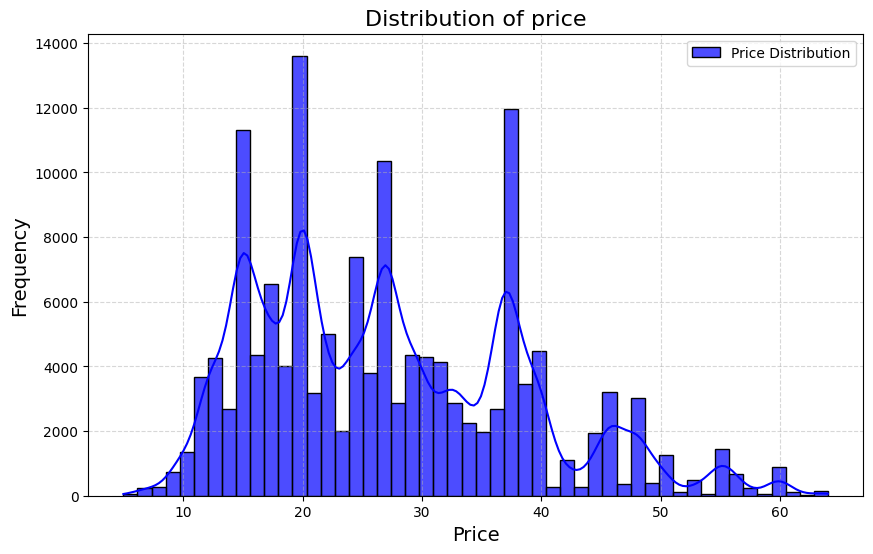

In [20]:
plot_price_distribution(clothes_data)

In [21]:
one_hot_columns = [col for col in clothes_data.columns if clothes_data[col].nunique() == 2 and set(clothes_data[col].unique()) <= {0, 1}]
imbalanced_cols = {}

for col in one_hot_columns:
    proportion = clothes_data[col].mean()  # Mean of 1s gives the proportion of that category
    if proportion < 0.1:  # Adjust the threshold as needed
        imbalanced_cols[col] = proportion

# Display results
if imbalanced_cols:
    print("Imbalanced One-Hot Encoded Columns:")
    for col, proportion in imbalanced_cols.items():
        print(f"{col}: {proportion:.2%} (proportion of 1s)")
else:
    print("No imbalanced one-hot encoded columns found.")

Imbalanced One-Hot Encoded Columns:
Lyocell: 0.04% (proportion of 1s)
Leather: 0.01% (proportion of 1s)
Tie: 9.85% (proportion of 1s)
Zipper: 2.87% (proportion of 1s)
Button: 1.99% (proportion of 1s)


In [22]:
from sklearn.preprocessing import LabelEncoder
brand_categories = [clothes_data['brand'].unique()]

In [23]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target (y)
X = clothes_data.drop(columns=["price"])  # Replace "price" with your target column name
y = clothes_data["price"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class ClothesPriceMLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ClothesPriceMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, int(hidden_size/2))
        self.fc3 = nn.Linear(int(hidden_size/2), int(hidden_size/4))
        self.fc4 = nn.Linear(int(hidden_size/4), int(hidden_size/8))  
        self.fc5 = nn.Linear(int(hidden_size/8), 1)  
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(int(hidden_size / 2))
        self.bn3 = nn.BatchNorm1d(int(hidden_size / 4))
        self.bn4 = nn.BatchNorm1d(int(hidden_size / 8))

    def forward(self, x):
        x = F.dropout(self.fc1(x),p=0.2)
        x = F.relu(x)
        x = self.bn1(x)
        x = F.dropout(self.fc2(x),p=0.2)
        x = F.relu(x)
        x = self.bn2(x)
        x = F.dropout(self.fc3(x),p=0.2)
        x = F.relu(x)
        x = self.bn3(x)
        x = F.relu(self.fc4(x))
        x = self.bn4(x)
        x = self.fc5(x)
        return x



In [ ]:
import torch.optim as optim

# Hyperparameters
input_size = X_train.shape[1]
batch_size = 128

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)

# Create DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)



In [ ]:
print(device)

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # if (epoch + 1) % 10 == 0:
        # print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

In [ ]:
def evaluate_model(model, val_loader, device):
    model.eval()
    val_predictions = []
    val_targets = []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            predictions = model(batch_x)
            val_predictions.append(predictions)
            val_targets.append(batch_y)
        
    val_predictions = torch.cat(val_predictions).cpu().numpy()
    val_targets = torch.cat(val_targets).cpu().numpy()
        
        # Calculate MAE
    mae = mean_absolute_error(val_targets, val_predictions)
    rmse = np.sqrt(mean_squared_error(val_targets, val_predictions))
    r2 = r2_score(val_targets, val_predictions)
    return mae, rmse, r2

In [ ]:
def grid_search(train_loader, val_loader, input_size, param_grid, device, checkpoint_path):
    best_params = None
    best_score = float('inf')
    results = []

    # Generate all combinations of hyperparameters
    param_combinations = list(itertools.product(*param_grid.values()))
    
    for idx, combination in enumerate(param_combinations, 1):
        params = dict(zip(param_grid.keys(), combination))
        
        # Initialize model
        model = ClothesPriceMLP(input_size, params['hidden_size'])
        criterion = nn.L1Loss()
        optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'])
        
        # Train model
        train_model(model, train_loader, criterion, optimizer, params['num_epochs'], device)
        
        # Evaluate model
        mae, rmse, r2 = evaluate_model(model, val_loader, device)
        results.append({'params': params, 'mae': mae, 'rmse': rmse, 'r2': r2})
        
        # Update best model
        if mae < best_score:
            best_score = mae
            best_params = params
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Iteration {idx}/{len(param_combinations)}:")
            print(f"Params: {params}")
            print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return best_params, best_score, results

In [ ]:
param_grid = {
    'hidden_size': [2048,4096],
    'learning_rate': [0.001,0.005,0.008],
    'num_epochs': [20,22,24,26,28],
}

best_params, best_score, results = grid_search(train_loader, val_loader, X_train.shape[1], param_grid, device, checkpoint_path='best_param_model.pth')

# Print final best results
print("\nBest Parameters:", best_params)
print("Best MAE:", best_score)

In [40]:
input_size = 31
hidden_size = 2048
model = ClothesPriceMLP(input_size, hidden_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("/kaggle/input/best-param-model/best_param_model.pth", map_location=torch.device(device)))
model.eval()
df = pd.read_json("/kaggle/input/prj-data/preprocess_data.json")
drop_columns = ['name', 'asin', 'url']
df = df.drop(columns=drop_columns)
# Extract the input and output
X = df.drop(columns=["price"])  # Replace "price" with your target column name
y = df["price"]


test_data = df.iloc[[240]]  # Keep it as a DataFrame
y_true = test_data['price']
print(y_true)

X_test = test_data.drop(columns=["price"])
X_test = scaler.transform(X_test)
# Convert DataFrame to a NumPy array and then to a PyTorch tensor
X_test = torch.tensor(X_test, dtype=torch.float32)
# print(X_test.shape)  # Check the shape of input tensor
X_test = X_test.squeeze()  # Removes the extra dimension if it's 1
# print("After squeezing:", X_test.shape)  # Shape should now be (1, 31)
X_test = X_test.unsqueeze(0)  # Add the batch dimension explicitly
# print("After unsqueeze:", X_test.shape)
# Get the model's prediction
outputs = model(X_test)


/tmp/ipykernel_23/2940061052.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/best-param-model/best_param_model.pth", map_

240    23.71
Name: price, dtype: float64


In [41]:
print(outputs)

tensor([[28.7516]], grad_fn=<AddmmBackward0>)


In [42]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']